In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [126]:
Train = pd.read_csv("train(1).csv")
df = pd.DataFrame(Train)
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Sendiri,Embarked,Fare
0,0,3,male,22.0,1,0,0,S,7.2500
1,1,1,female,38.0,1,0,0,C,71.2833
2,1,3,female,26.0,0,0,1,S,7.9250
3,1,1,female,35.0,1,0,0,S,53.1000
4,0,3,male,35.0,0,0,1,S,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,1,S,13.0000
887,1,1,female,19.0,0,0,1,S,30.0000
888,0,3,female,NaN,1,2,0,S,23.4500
889,1,1,male,26.0,0,0,1,C,30.0000


In [121]:
# Train = Train.drop(['PassengerId'],axis=1)
# Train

In [127]:
Train = pd.get_dummies(Train)
Train = Train.drop(['Sex_male', 'Embarked_S'],axis=1)
head = Train.columns
head = list(head)
Train

,Survived,Pclass,Age,SibSp,Parch,Sendiri,Fare,Sex_female,Embarked_C,Embarked_Q
0,0,3,22.0,1,0,0,7.2500,0,0,0
1,1,1,38.0,1,0,0,71.2833,1,1,0
2,1,3,26.0,0,0,1,7.9250,1,0,0
3,1,1,35.0,1,0,0,53.1000,1,0,0
4,0,3,35.0,0,0,1,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,13.0000,0,0,0
887,1,1,19.0,0,0,1,30.0000,1,0,0
888,0,3,NaN,1,2,0,23.4500,1,0,0
889,1,1,26.0,0,0,1,30.0000,0,1,0


In [128]:
# Train[['Pclass']] = Train[['Pclass']].fillna(value = Train[['Pclass']].mode, inplace = True)
# Train[['SibSp']] = Train[['SibSp']].fillna(value = Train[['SibSp']].mode, inplace = True)
# Train[['Parch']] = Train[['Parch']].fillna(value = Train[['Parch']].mode, inplace = True)
# Train[['Sex_female']] = Train[['Sex_female']].fillna(value = Train[['Sex_female']].mode, inplace = True)
# Train[['Embarked_C']] = Train[['Embarked_C']].fillna(value = Train[['Embarked_C']].mode, inplace = True)
# Train[['Embarked_Q']] = Train[['Embarked_Q']].fillna(value = Train[['Embarked_Q']].mode, inplace = True)
# Train[['Age']] = Train[['Age']].fillna(value = Train[['Age']].mean, inplace = True)
# Train[['Fare']] = Train[['Fare']].fillna(value = Train[['Fare']].mean, inplace = True)

# Train

col_name = ['Survived','Pclass','Age','SibSp','Parch','Sendiri','Fare','Sex_female','Embarked_C','Embarked_Q']

feature = Train[col_name]

# col_name_num = ['Age','Fare']
# feature_num = Train[col_name]

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Train = imp.fit_transform(feature)

Train = pd.DataFrame(Train)
Train.columns = col_name
Train

,Survived,Pclass,Age,SibSp,Parch,Sendiri,Fare,Sex_female,Embarked_C,Embarked_Q
0,0.0,3.0,22.0,1.0,0.0,0.0,7.2500,0.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,0.0,71.2833,1.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,1.0,7.9250,1.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0,0.0,53.1000,1.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,1.0,8.0500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,1.0,13.0000,0.0,0.0,0.0
887,1.0,1.0,19.0,0.0,0.0,1.0,30.0000,1.0,0.0,0.0
888,0.0,3.0,24.0,1.0,2.0,0.0,23.4500,1.0,0.0,0.0
889,1.0,1.0,26.0,0.0,0.0,1.0,30.0000,0.0,1.0,0.0


In [129]:
# col_name = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_female','Embarked_C','Embarked_Q']

# # col_name_classed = ['Pclass','SibSp','Parch','Sex_female','Embarked_C','Embarked_Q']
# # feature_classed = Train[col_name_classed]

# col_name_num = ['Age','Fare']
# feature_num = Train[col_name_num]

# imp_class = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_class.fit(feature_num)

# Train[col_name_num] = imp_class.transform(feature_num)
# Train = pd.DataFrame(Train)
# Train.columns = col_name
# Train

In [130]:
# col_name = ['Pclass','Age','SibSp','Parch','Fare','Sex_female','Embarked_C','Embarked_Q']
# feature = Train[col_name]

# std = StandardScaler()
# std.fit(feature.values)
# scaled = std.transform(feature.values)
# Train[col_name] = scaled
# Train

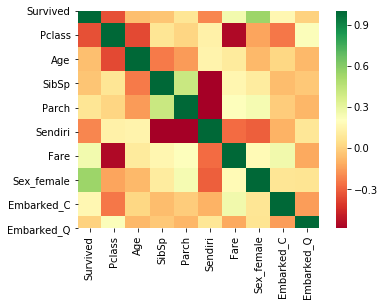

In [131]:
corr = Train.corr()
sns.heatmap(corr, square=True, cmap="RdYlGn")

In [132]:
y = Train['Survived']
X = Train.drop(['Survived'],axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

In [133]:
# k = np.arange(1,10)
# param_grid = {'n_neighbors': k}
# knn = KNeighborsClassifier()

# c_space = np.logspace(1, -5, 8, 15)
# param_grid = {'C': c_space}
logreg = LogisticRegression()

# param_grid = {'n_estimators' : np.arange(10)}
# rf = RandomForestClassifier(n_estimators=201, oob_score= True)
# rf = RandomForestClassifier()

# grid = GridSearchCV(rf, param_grid, cv = 10)
logreg.fit(X_train, y_train)
y_predict_val = logreg.predict(X_val)

# print("Tuned Logistic Regression Parameters: {}".format(grid.best_params_)) 
# print("Best score is {}".format(grid.best_score_))

print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       157
         1.0       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



C:\Users\zunaf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [136]:
Test = pd.read_csv("test(1).csv")
X_Test = pd.read_csv("test(1).csv")
Test = Test.drop(['PassengerId'],axis=1)
Test

,Pclass,Sex,Age,SibSp,Parch,Sendiri,Embarked,Fare
0,3,male,34.5,0,0,1,Q,7.8292
1,3,female,47.0,1,0,0,S,7.0000
2,2,male,62.0,0,0,1,Q,9.6875
3,3,male,27.0,0,0,1,S,8.6625
4,3,female,22.0,1,1,0,S,12.2875
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,1,S,8.0500
414,1,female,39.0,0,0,1,C,108.9000
415,3,male,38.5,0,0,1,S,7.2500
416,3,male,NaN,0,0,1,S,8.0500


In [137]:
Test = pd.get_dummies(Test)
Test = Test.drop(['Sex_male','Embarked_S'],axis=1)
Test

,Pclass,Age,SibSp,Parch,Sendiri,Fare,Sex_female,Embarked_C,Embarked_Q
0,3,34.5,0,0,1,7.8292,0,0,1
1,3,47.0,1,0,0,7.0000,1,0,0
2,2,62.0,0,0,1,9.6875,0,0,1
3,3,27.0,0,0,1,8.6625,0,0,0
4,3,22.0,1,1,0,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,1,8.0500,0,0,0
414,1,39.0,0,0,1,108.9000,1,1,0
415,3,38.5,0,0,1,7.2500,0,0,0
416,3,NaN,0,0,1,8.0500,0,0,0


In [138]:
head = Test.columns
head = list(head)

col_name = ['Pclass','Age','SibSp','Parch','Sendiri','Fare','Sex_female','Embarked_C','Embarked_Q']
feature = Test[col_name]

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Test = imp.fit_transform(feature)

# Test[col_name] = imp.transform(feature_classed)
Test = pd.DataFrame(Test)
Test.columns = head
Test

# col_name = ['Pclass','Age','SibSp','Parch','Fare','Sex_female','Embarked_C','Embarked_Q']
# feature = Test[col_name]

# std = StandardScaler()
# std.fit(feature.values)
# scaled = std.transform(feature.values)
# Test[col_name] = scaled
# Test

,Pclass,Age,SibSp,Parch,Sendiri,Fare,Sex_female,Embarked_C,Embarked_Q
0,3.0,34.5,0.0,0.0,1.0,7.8292,0.0,0.0,1.0
1,3.0,47.0,1.0,0.0,0.0,7.0000,1.0,0.0,0.0
2,2.0,62.0,0.0,0.0,1.0,9.6875,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,1.0,8.6625,0.0,0.0,0.0
4,3.0,22.0,1.0,1.0,0.0,12.2875,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
413,3.0,21.0,0.0,0.0,1.0,8.0500,0.0,0.0,0.0
414,1.0,39.0,0.0,0.0,1.0,108.9000,1.0,1.0,0.0
415,3.0,38.5,0.0,0.0,1.0,7.2500,0.0,0.0,0.0
416,3.0,21.0,0.0,0.0,1.0,8.0500,0.0,0.0,0.0


In [139]:
# col_name_num = ['Age','Fare']
# feature_num = Test[col_name_num]

# imp_class = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_class.fit(feature_num)

# Test[col_name_num] = imp_class.transform(feature_num)
# Test = pd.DataFrame(Test)
# Test.columns = head
# Test

In [140]:
y_predict = logreg.predict(Test)
y_predict = y_predict.astype(int)

In [141]:
arr = []
for i, j in enumerate(y_predict):
  id = X_Test.iloc[i,0]
  arr_temp = [id, j]
  arr.append(arr_temp)

df_upload = pd.DataFrame(arr)
df_upload.columns = ['PassengerId','Survived']

df_upload.to_csv('upload.csv', index=False)

pd.read_csv("upload.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
